In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r'C:\Users\umang\OneDrive\Desktop\Machine Learning A-Z (Codes and Datasets)\Projects\Digit Recognizer\train.csv')
test = pd.read_csv(r'C:\Users\umang\OneDrive\Desktop\Machine Learning A-Z (Codes and Datasets)\Projects\Digit Recognizer\test.csv')

<AxesSubplot:xlabel='label', ylabel='count'>

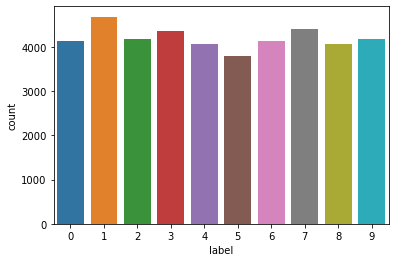

In [3]:
sns.countplot(train['label'])

In [4]:
#Splitting the dataset
x_train =train.drop('label',axis=1)
y_train = train['label']

x_test = test

In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
print(x_train.shape)
print(x_test.shape)

(42000, 784)
(28000, 784)


In [7]:
#Reshaping
x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [8]:
y_train = pd.get_dummies(y_train)

In [9]:
#Splitting train and test set
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=26)

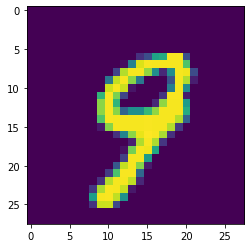

In [10]:
g=plt.imshow(x_train[3])

In [17]:
cnn = tf.keras.models.Sequential()

In [18]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[28,28,1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25)) #to reduce overfitting

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[28,28,1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [20]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[28,28,1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [23]:
cnn.add(tf.keras.layers.Flatten())

In [24]:
cnn.add(tf.keras.layers.Dense(units=256, activation='relu')) 
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax')) 

In [25]:
cnn.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
# datagen = ImageDataGenerator(
#     shear_range = 0.2,
#     zoom_range = 0.2,
#     featurewise_center=True,
#     samplewise_center=True,
#     featurewise_std_normalization=True,
#     samplewise_std_normalization=True
#     )

In [27]:
model = cnn.fit(x_train, y_train,batch_size=25,validation_data = (x_val, y_val),steps_per_epoch=x_train.shape[0]//56,epochs=20)

Epoch 1/20
600/600 [==============================] - 20s 32ms/step - loss: 1.1499 - accuracy: 0.6055 - val_loss: 0.1863 - val_accuracy: 0.9394
Epoch 2/20
600/600 [==============================] - 35s 58ms/step - loss: 0.2537 - accuracy: 0.9230 - val_loss: 0.1130 - val_accuracy: 0.9662
Epoch 3/20
600/600 [==============================] - 29s 48ms/step - loss: 0.1953 - accuracy: 0.9399 - val_loss: 0.0961 - val_accuracy: 0.9690
Epoch 4/20
600/600 [==============================] - 29s 48ms/step - loss: 0.1491 - accuracy: 0.9567 - val_loss: 0.0814 - val_accuracy: 0.9740
Epoch 5/20
600/600 [==============================] - 29s 49ms/step - loss: 0.1366 - accuracy: 0.9570 - val_loss: 0.0721 - val_accuracy: 0.9789
Epoch 6/20
600/600 [==============================] - 31s 51ms/step - loss: 0.1238 - accuracy: 0.9615 - val_loss: 0.0732 - val_accuracy: 0.9777
Epoch 7/20
600/600 [==============================] - 33s 55ms/step - loss: 0.1312 - accuracy: 0.9566 - val_loss: 0.0660 - val_accuracy:

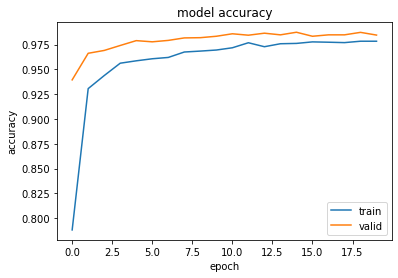

In [28]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='best')

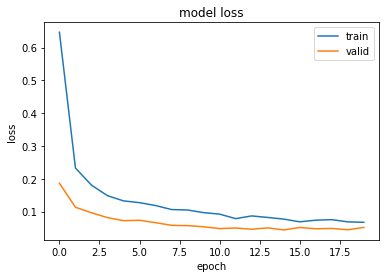

In [29]:
# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='best')

In [30]:
result = cnn.predict(x_test)

In [31]:
result=np.argmax(result,axis=1)

In [32]:
result

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [33]:
result = pd.Series(result, name = 'Label')

In [34]:
submission = pd.concat([pd.Series(range(1, 28001), name = 'ImageId'), result], axis = 1)

In [35]:
submission.to_csv('digit_submission.csv',index=False)